In [1]:
import h5py
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import pyfftw as ft
import time
import pyJHTDB
from pyJHTDB.dbinfo import isotropic1024coarse
from pyJHTDB import libJHTDB

In [2]:
N = 1024

In [3]:
start = time.time()

wiz = (b'(fftw-3.3.4 fftw_wisdom #x41ad5c95 #x159437f1 #x23fdee71 #xc6cf4464\n)\n', b'(fftw-3.3.4 fftwf_wisdom #xa84d9475 #xdb220970 #x4aa6f1c4 #xf3163254\n  (fftwf_rdft2_thr_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x0478d9e6 #xffc458b2 #xefeba0c5 #xe8fb2e05)\n  (fftwf_dft_buffered_register 1 #x11bdd #x11bdd #x0 #xb6380734 #x8d827d8e #xdc067a28 #x4fc763de)\n  (fftwf_rdft_rank0_register 4 #x10bdd #x10bdd #x0 #xf3c0402e #xf303d9aa #xbdc22798 #xd9510af9)\n  (fftwf_rdft2_rank_geq2_register 0 #x11bdd #x11bdd #x0 #xe0177557 #xe9f32997 #xfb2dcb2c #xf8f70860)\n  (fftwf_dft_buffered_register 0 #x10bdd #x10bdd #x0 #x3eeb1978 #x428183dc #x2a84fbfa #xe4361ea0)\n  (fftwf_codelet_hc2cb_8 0 #x10bdd #x10bdd #x0 #x48259488 #x196c8c29 #x37f91b06 #x556264da)\n  (fftwf_rdft2_rank_geq2_register 0 #x10bdd #x10bdd #x0 #xb27d35ea #xa96ba975 #x4796bd74 #xae50e653)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #x68ff47a8 #x21bb9e5b #xa20dc9bd #xd2485c0c)\n  (fftwf_codelet_r2cb_8 2 #x10bdd #x10bdd #x0 #x669a3813 #x9ba2bb21 #x64e8656d #x87c9de00)\n  (fftwf_dft_indirect_register 0 #x10bdd #x10bdd #x0 #x9c0e3f58 #x928ea026 #xd28229a3 #x7246e0ac)\n  (fftwf_codelet_q1_4 0 #x10fdd #x10fdd #x0 #xee87b2d5 #x3e497607 #xfff1907f #xf9579a39)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #x8676a7b7 #xe006c70d #x487b0278 #xb2f8f002)\n  (fftwf_rdft2_rank_geq2_register 0 #x10bdd #x10bdd #x0 #xb8bedcad #x45a4525b #xc44e4385 #xa637a3a4)\n  (fftwf_codelet_r2cf_8 2 #x11bdd #x11bdd #x0 #x675249aa #x037557b8 #x14643a4b #x9ea626ef)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x33c540f7 #x7207139c #x75ca3a4c #x748bc1b6)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #xf6843763 #xe67a42c5 #x37896514 #x1934a686)\n  (fftwf_rdft_rank0_register 3 #x10bdd #x10bdd #x0 #x91607aa1 #xd40dae11 #x01dbbb42 #x733d3911)\n  (fftwf_codelet_t1_4 0 #x10fdd #x10fdd #x0 #x1e5fa302 #x4dca4b4b #x68854fe7 #x57f745da)\n  (fftwf_dft_r2hc_register 0 #x11bdd #x11bdd #x0 #x129e3b9a #xbe5c8c09 #x84314e36 #x92c09d6d)\n  (fftwf_rdft2_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x1a3fc773 #x16826a6d #x4ac1ba9b #x71705541)\n  (fftwf_codelet_r2cfII_8 2 #x11bdd #x11bdd #x0 #xc7a8d0be #x7798b669 #x9437b479 #x2ba791fc)\n  (fftwf_dft_nop_register 0 #x11bdd #x11bdd #x0 #x2ca97a7c #x1278c07a #x4b274fea #x63afcfcd)\n  (fftwf_rdft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x2b2a182d #x1a4f0eb8 #x4051bfc8 #x50ede16d)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #x09558463 #xdea41841 #xf014e84a #x343a12e5)\n  (fftwf_dft_buffered_register 0 #x11bdd #x11bdd #x0 #xf6040783 #x4ecac406 #x61d1e470 #xc372144f)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x37c7ab24 #x6b6a7433 #xbb43af76 #x9bd7720f)\n  (fftwf_codelet_t1_16 0 #x10bdd #x10bdd #x0 #xcd08c9cd #xac2dabe6 #x0a6d47c5 #x5b07814f)\n  (fftwf_dft_nop_register 0 #x10bdd #x10bdd #x0 #xd84e4956 #xbbda597c #x4dcc8ca2 #x8135f48a)\n  (fftwf_dft_nop_register 0 #x11bdd #x11bdd #x0 #xb5f6482a #x970cff75 #xad1e3938 #x526a74d7)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x54bf9035 #xa469d859 #x8c3af79c #xaabf7edf)\n  (fftwf_codelet_t1_16 0 #x10bdd #x10bdd #x0 #xbf8f2281 #x53d808d5 #x34ab52eb #x747f8bf4)\n  (fftwf_dft_nop_register 0 #x10bdd #x10bdd #x0 #x4c6eda6a #xd64bb98a #xdeff4d47 #xbd9bc277)\n  (fftwf_rdft_rank0_register 2 #x11bdd #x11bdd #x0 #x104e8159 #x92ac0177 #x0f50339e #x2c4a57af)\n  (fftwf_codelet_t1_4 0 #x10fdd #x10fdd #x0 #x914f085b #x7945eab1 #xb24b3509 #x41ff886a)\n  (fftwf_dft_buffered_register 1 #x10bdd #x10bdd #x0 #x7cf6cc98 #x1860681d #x04f92f92 #x64e3787b)\n  (fftwf_codelet_n1_64 0 #x10fdd #x10fdd #x0 #x2d58151a #x7bf279ac #xd05075c9 #x05025c02)\n  (fftwf_codelet_hc2cf_8 0 #x11bdd #x11bdd #x0 #xa3aa3245 #xfa89ad84 #x6f51d136 #x21269ea8)\n  (fftwf_codelet_q1_4 0 #x10fdd #x10fdd #x0 #x6e3f6b00 #xc631065b #xc5ce0991 #xc9e5830a)\n  (fftwf_rdft2_thr_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x245908be #x1b45c309 #xfa989829 #xe3448ecb)\n  (fftwf_dft_thr_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #xce1da3b2 #xb156b9ff #x345deb46 #x24967a68)\n  (fftwf_codelet_n1_64 0 #x10bdd #x10bdd #x0 #xbf36f96d #xc5099024 #xab4588dd #x0f71c101)\n  (fftwf_dft_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #xca4b9bb9 #x447b7ee5 #xbb98516b #x49ee082c)\n  (fftwf_rdft_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x2fdf6c57 #xa3a423cb #x3c83b16e #xd62995da)\n  (fftwf_dft_indirect_register 0 #x10bdd #x10bdd #x0 #x938d7e18 #x1343c0de #xbe03a120 #x64e734a9)\n  (fftwf_codelet_n1_64 0 #x10fdd #x10fdd #x0 #xee00c037 #x8d699089 #xad7ad6a0 #x4efaaf7d)\n  (fftwf_dft_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x1fe15182 #x5f3d421c #xba834eb6 #x2292df94)\n  (fftwf_rdft2_rank_geq2_register 0 #x11bdd #x11bdd #x0 #xbd6b8262 #xabd0b6b7 #xe6ad6d03 #x628df7dc)\n  (fftwf_rdft_rank0_register 2 #x10bdd #x10bdd #x0 #x104e8159 #x92ac0177 #x0f50339e #x2c4a57af)\n  (fftwf_rdft2_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x32025de0 #x37ce7b0a #x95c084dd #xcd18ab21)\n  (fftwf_codelet_r2cb_128 0 #x10bdd #x10bdd #x0 #x673294cd #xe5b085a3 #xb8a774bf #xfd19dfb2)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x3c666628 #x01043fe7 #x20ba9e85 #x1f9b67a1)\n  (fftwf_codelet_r2cbIII_8 2 #x10bdd #x10bdd #x0 #xfb67696a #x19d836b7 #x6b24c329 #xe4fc2e8b)\n  (fftwf_rdft_rank0_register 3 #x11bdd #x11bdd #x0 #x91607aa1 #xd40dae11 #x01dbbb42 #x733d3911)\n  (fftwf_dft_r2hc_register 0 #x11bdd #x11bdd #x0 #x38a08196 #x2a4ca72e #x2d1ba440 #x10600d8c)\n  (fftwf_codelet_n1_64 0 #x10bdd #x10bdd #x0 #x1913d4ac #xf2d50866 #xc504d3dd #x76d5edcd)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #x411f7a68 #x161cf1d6 #xbec2d98e #x7d9fdffa)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x89cb22ca #x6491b1a8 #xf5f7b0be #x3cd19d43)\n  (fftwf_dft_thr_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x519e2811 #xfd996521 #x222afcf1 #xa289f0a6)\n  (fftwf_codelet_r2cf_128 0 #x11bdd #x11bdd #x0 #x23eb177d #x111d2c06 #xa78f35fb #xd56dcd76)\n)\n', b'(fftw-3.3.4 fftwl_wisdom #x0821b5c7 #xa4c07d5a #x21b58211 #xebe513ab\n)\n')
wiz_aws = ('(fftw-3.3.5 fftw_wisdom #x3c273403 #x192df114 #x4d08727c #xe98e9b9d\n)\n','(fftw-3.3.5 fftwf_wisdom #x706526c0 #x2f8b6c85 #x8cd1bb1a #x7c96e03d\n  (fftwf_codelet_n1fv_32_avx 0 #x10fdd #x10fdd #x0 #xd3a62617 #x8a0451dd #x42952706 #x6501219f)\n  (fftwf_rdft2_rank_geq2_register 0 #x10bdd #x10bdd #x0 #xb8bedcad #x45a4525b #xc44e4385 #xa637a3a4)\n  (fftwf_rdft_rank0_register 4 #x10bdd #x10bdd #x0 #xf3c0402e #xf303d9aa #xbdc22798 #xd9510af9)\n  (fftwf_rdft2_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x1a3fc773 #x16826a6d #x4ac1ba9b #x71705541)\n  (fftwf_codelet_hc2cf_16 0 #x11bdd #x11bdd #x0 #xa3aa3245 #xfa89ad84 #x6f51d136 #x21269ea8)\n  (fftwf_dft_thr_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x9841df4f #xe400dd23 #xd6ec67a7 #x522d17d5)\n  (fftwf_rdft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x2a9ad576 #x6117ee04 #x58022324 #x6ed5dcef)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #xea28ce24 #xc8cff39e #xa823c75f #x926c5590)\n  (fftwf_rdft2_thr_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #xecb29e47 #x03b3cd61 #xa27bbdd7 #xf1a239db)\n  (fftwf_dft_indirect_register 0 #x10fdd #x10fdd #x0 #x4708cf10 #x9dd6031e #x074d1f25 #xae61f28f)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #x8676a7b7 #xe006c70d #x487b0278 #xb2f8f002)\n  (fftwf_codelet_n1_32 0 #x10bdd #x10bdd #x0 #x660a6630 #xc4ce3c6a #x62a726bb #x4f6728ee)\n  (fftwf_codelet_r2cb_16 2 #x10bdd #x10bdd #x0 #xc8ec6694 #xe750e6f2 #x3889104c #xec903173)\n  (fftwf_dft_buffered_register 1 #x10bdd #x10bdd #x0 #xf6843763 #xe67a42c5 #x37896514 #x1934a686)\n  (fftwf_rdft_rank0_register 4 #x11bdd #x11bdd #x0 #x91607aa1 #xd40dae11 #x01dbbb42 #x733d3911)\n  (fftwf_dft_r2hc_register 0 #x11bdd #x11bdd #x0 #x9382d45c #x3b4ef564 #x05a9af24 #x70bb1b32)\n  (fftwf_dft_nop_register 0 #x10bdd #x10bdd #x0 #xb99abc38 #x8ead8d6b #xf0c5f1c4 #x54d4dbc2)\n  (fftwf_dft_thr_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x519e2811 #xfd996521 #x222afcf1 #xa289f0a6)\n  (fftwf_dft_nop_register 0 #x11bdd #x11bdd #x0 #x2ca97a7c #x1278c07a #x4b274fea #x63afcfcd)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #xf91e412c #xc1e62b4b #xb772f42b #x91524b5a)\n  (fftwf_codelet_hc2cb_16 0 #x10bdd #x10bdd #x0 #x48259488 #x196c8c29 #x37f91b06 #x556264da)\n  (fftwf_rdft_rank0_register 3 #x11bdd #x11bdd #x0 #xb7dce065 #x1bc70b3f #xefe0c473 #x60ae45b7)\n  (fftwf_rdft_rank0_register 4 #x10bdd #x10bdd #x0 #x91607aa1 #xd40dae11 #x01dbbb42 #x733d3911)\n  (fftwf_rdft2_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x32025de0 #x37ce7b0a #x95c084dd #xcd18ab21)\n  (fftwf_codelet_t2fv_32_avx 0 #x10bdd #x10bdd #x0 #xcd08c9cd #xac2dabe6 #x0a6d47c5 #x5b07814f)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x1b302212 #x94fbdfad #xf5eb1b1e #x9cbc4116)\n  (fftwf_codelet_r2cf_64 0 #x11bdd #x11bdd #x0 #xfd689742 #x8cf30941 #x28dc0368 #x1d560726)\n  (fftwf_codelet_r2cb_64 0 #x10bdd #x10bdd #x0 #x732a80e5 #xfdc1c3ba #xa26d2e2b #xc829547e)\n  (fftwf_codelet_n1bv_32_avx 0 #x10bdd #x10bdd #x0 #x308753a3 #xcc3d5e80 #xf64312e3 #xc698c209)\n  (fftwf_dft_buffered_register 1 #x10bdd #x10bdd #x0 #x7cf6cc98 #x1860681d #x04f92f92 #x64e3787b)\n  (fftwf_dft_nop_register 0 #x10bdd #x10bdd #x0 #xd84e4956 #xbbda597c #x4dcc8ca2 #x8135f48a)\n  (fftwf_dft_r2hc_register 0 #x10fdd #x10fdd #x0 #xf198bf27 #xb1c4fdb7 #xc76c5370 #xacd19ffe)\n  (fftwf_rdft2_rank_geq2_register 0 #x10bdd #x10bdd #x0 #xb27d35ea #xa96ba975 #x4796bd74 #xae50e653)\n  (fftwf_codelet_t2fv_32_avx 0 #x10fdd #x10fdd #x0 #x1e5fa302 #x4dca4b4b #x68854fe7 #x57f745da)\n  (fftwf_codelet_r2cf_16 2 #x11bdd #x11bdd #x0 #x50d2f46f #x7308bf05 #x1e8d0b64 #x12981444)\n  (fftwf_codelet_t2bv_32_avx 0 #x10bdd #x10bdd #x0 #xbf8f2281 #x53d808d5 #x34ab52eb #x747f8bf4)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #xdbd34cc3 #x010b1fae #x10e8d12b #x05b15faf)\n  (fftwf_codelet_t2bv_32_avx 0 #x10bdd #x10bdd #x0 #x354d5c68 #x9e923e23 #xcdb19ec8 #xc1743254)\n  (fftwf_rdft2_rank_geq2_register 0 #x11bdd #x11bdd #x0 #x245908be #x1b45c309 #xfa989829 #xe3448ecb)\n  (fftwf_dft_thr_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #xce1da3b2 #xb156b9ff #x345deb46 #x24967a68)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x54bf9035 #xa469d859 #x8c3af79c #xaabf7edf)\n  (fftwf_dft_buffered_register 1 #x11bdd #x11bdd #x0 #xca4b9bb9 #x447b7ee5 #xbb98516b #x49ee082c)\n  (fftwf_dft_indirect_register 0 #x10bdd #x10bdd #x0 #x938d7e18 #x1343c0de #xbe03a120 #x64e734a9)\n  (fftwf_codelet_r2cbIII_16 2 #x10bdd #x10bdd #x0 #x79d37ad9 #x16113414 #xc645ea14 #x3dd1bbb5)\n  (fftwf_dft_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x1fe15182 #x5f3d421c #xba834eb6 #x2292df94)\n  (fftwf_rdft_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #xf6b156b6 #x69706c05 #x3801e8c2 #xccec020e)\n  (fftwf_dft_r2hc_register 0 #x11bdd #x11bdd #x0 #x38a08196 #x2a4ca72e #x2d1ba440 #x10600d8c)\n  (fftwf_codelet_r2cfII_16 2 #x11bdd #x11bdd #x0 #xf9dc5ef5 #xdbec3d0d #x0942416f #x9d652f91)\n  (fftwf_rdft_rank0_register 6 #x10fdd #x10fdd #x0 #x31fc48ea #x91190d4a #x7e381771 #xc41342ed)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x3c666628 #x01043fe7 #x20ba9e85 #x1f9b67a1)\n  (fftwf_codelet_n1_32 0 #x10bdd #x10bdd #x0 #x3c733b9d #xdcb5c493 #xea0b7ccc #x494a2eea)\n  (fftwf_dft_buffered_register 1 #x11bdd #x11bdd #x0 #xb6380734 #x8d827d8e #xdc067a28 #x4fc763de)\n  (fftwf_rdft2_rank_geq2_register 0 #x11bdd #x11bdd #x0 #xbd6b8262 #xabd0b6b7 #xe6ad6d03 #x628df7dc)\n  (fftwf_rdft_rank0_register 3 #x10bdd #x10bdd #x0 #xb7dce065 #x1bc70b3f #xefe0c473 #x60ae45b7)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x9c0e3f58 #x928ea026 #xd28229a3 #x7246e0ac)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x89cb22ca #x6491b1a8 #xf5f7b0be #x3cd19d43)\n  (fftwf_rdft2_thr_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x0478d9e6 #xffc458b2 #xefeba0c5 #xe8fb2e05)\n  (fftwf_dft_nop_register 0 #x11bdd #x11bdd #x0 #xdeee3024 #xbaceb843 #xf78f49d6 #x68b91457)\n)\n','(fftw-3.3.5 fftwl_wisdom #x0821b5c7 #xa4c07d5a #x21b58211 #xebe513ab\n)\n')
wiz_pan = ('(fftw-3.2.1 fftw_wisdom\n)\n','(fftw-3.2.1 fftwf_wisdom\n  (fftwf_rdft_rank0_register 3 #x10bdd #x10bdd #x0 #x17333d08 #x8edd80ef #xd6077aac #xc600dd9c)\n  (fftwf_dft_r2hc_register 0 #x11bdd #x11bdd #x0 #x73597971 #x3f692c94 #x4eb3b585 #x3564fb02)\n  (fftwf_rdft_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #xf7dbc32c #x7bfe8fd1 #x6225e3ae #x5bfec555)\n  (fftwf_rdft_rank0_register 4 #x10bdd #x10bdd #x0 #xd61ca6b8 #xcf472fa4 #x3e2ef447 #x247b9341)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #x9de2bc1c #x7e18c7c7 #x0767b660 #xc8e91164)\n  (fftwf_codelet_r2cfII_8 2 #x11bdd #x11bdd #x0 #x32b1f8fc #x8d3c918b #xce98e177 #xa815f8d3)\n  (fftwf_codelet_t1_4 0 #x10fdd #x10fdd #x0 #xb8f247fc #xb8fa53ba #x7d5cec88 #x6a2cc555)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #xc436ee45 #x996b8534 #x450db1a9 #x3a33c51d)\n  (fftwf_dft_thr_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #xf1402b7d #xa3a3a325 #x0d49574e #x0d09937f)\n  (fftwf_rdft2_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x9bb194d6 #xb68b63ce #xa13a7c23 #xe3107465)\n  (fftwf_dft_nop_register 0 #x11bdd #x11bdd #x0 #x183a577e #xd7e3c62c #x4bcc0f2a #x233232bf)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x9258f3a7 #x005cd840 #xac58c76d #x068f56a8)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #xa20aa25d #x429ae7fd #x950f8f28 #xaadfce5f)\n  (fftwf_rdft2_rank_geq2_register 0 #x11bdd #x11bdd #x0 #xbac9c1d4 #x0b224365 #x95e797f4 #xb6df2cc6)\n  (fftwf_codelet_hc2cb_16 0 #x10bdd #x10bdd #x0 #x5cf94f7b #xceb68dab #x52a6ba80 #xe8720c22)\n  (fftwf_rdft_rank0_register 3 #x10bdd #x10bdd #x0 #x1d424cc9 #x1470a7e8 #x2c308c92 #x2e5655f7)\n  (fftwf_dft_nop_register 0 #x11bdd #x11bdd #x0 #x8769fcd3 #x4b8136bd #x6dd7e056 #x01df49de)\n  (fftwf_rdft2_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x4a598cec #xb55dae1c #xfcd414a6 #xee0420b9)\n  (fftwf_codelet_r2cb_64 0 #x10bdd #x10bdd #x0 #xb382453b #xbc6c1fa5 #x744be879 #x23932d1c)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x82b131d5 #xd5dc92f0 #x3d3ce22c #x960aebdf)\n  (fftwf_dft_thr_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #xb8edb03a #x684adcba #x9166094e #x719ce4cb)\n  (fftwf_rdft_rank0_register 3 #x11bdd #x11bdd #x0 #xc38de049 #x749dcc3a #x59c86a86 #xfac577ce)\n  (fftwf_dft_nop_register 0 #x10bdd #x10bdd #x0 #xefe16ed7 #xa13ffea6 #x4cb34c71 #x99e2609a)\n  (fftwf_rdft2_rank_geq2_register 0 #x11bdd #x11bdd #x0 #xc3987657 #xb038fe87 #xe47bb398 #x2198f783)\n  (fftwf_dft_indirect_register 0 #x10bdd #x10bdd #x0 #x6b55daf1 #xeedaa247 #x4169b219 #x471c6cb8)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x481d14e9 #xfc2b8a82 #x54aeff44 #xaf3c3eed)\n  (fftwf_rdft2_thr_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x55be3aa3 #xcc62ed20 #x181f329a #xb93bf8ab)\n  (fftwf_codelet_t1_16 0 #x10bdd #x10bdd #x0 #xc54b9597 #xcedcb6cf #x66549ead #xac0cbf09)\n  (fftwf_codelet_t1_16 0 #x10bdd #x10bdd #x0 #x3dc2df28 #x0e40a456 #x1c449577 #x34701e37)\n  (fftwf_codelet_n1_64 0 #x10fdd #x10fdd #x0 #x11559ac4 #xea86db86 #xad6ae8e4 #x97f477c6)\n  (fftwf_codelet_t1_16 0 #x10bdd #x10bdd #x0 #x444aa1ed #xbfa70e99 #x7fc3ef42 #x870daef5)\n  (fftwf_codelet_n1_64 0 #x10bdd #x10bdd #x0 #x5d8865dd #xf5555f1d #x98ed7615 #xb74f4ba5)\n  (fftwf_dft_buffered_register 1 #x10bdd #x10bdd #x0 #x3aee36ad #xf81507d9 #xaeec5eec #x4a1ae49f)\n  (fftwf_codelet_r2cf_8 2 #x11bdd #x11bdd #x0 #x0a076fcf #x7ab5a641 #xf8554cba #x6189532c)\n  (fftwf_codelet_n1_64 0 #x10fdd #x10fdd #x0 #x67697a12 #xefa46667 #x8b4f578f #x0ce1cd5d)\n  (fftwf_codelet_hc2cf_8 0 #x11bdd #x11bdd #x0 #x41be5f3a #x8e188182 #x0eb7a0fa #x9ec11807)\n  (fftwf_rdft2_rank_geq2_register 0 #x10bdd #x10bdd #x0 #x38de26f9 #x44ca4c7c #x1087bc01 #x2a7d4eb1)\n  (fftwf_rdft_rank0_register 3 #x10bdd #x10bdd #x0 #x91607aa1 #xd40dae11 #x01dbbb42 #x733d3911)\n  (fftwf_dft_buffered_register 1 #x10bdd #x10bdd #x0 #x6166df93 #x10ac3daa #x0d24c247 #x49d07678)\n  (fftwf_dft_thr_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #xf3a43230 #xb7930d1b #xd3d7b6f1 #xd3c540ea)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #xf5697fe5 #xd8d91ca2 #x330a4b69 #x4a1a71e7)\n  (fftwf_codelet_n1_64 0 #x10bdd #x10bdd #x0 #x57da8d92 #x4132851a #xcf3ba48c #xb978683f)\n  (fftwf_dft_buffered_register 0 #x11bdd #x11bdd #x0 #xd4112e8d #x84e09c74 #x042cb226 #xd0c4cb02)\n  (fftwf_codelet_q1_4 0 #x10fdd #x10fdd #x0 #x97d22b6b #xae1cc81d #x1852d0be #xff1c9eaa)\n  (fftwf_codelet_r2cf_128 0 #x11bdd #x11bdd #x0 #x97e393c8 #xca274e2c #x858e4556 #x684616d9)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #x652b0af3 #x5b84278b #x24619407 #x33abea69)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x3e80cd72 #xb96f0593 #x41719ae1 #x04050744)\n  (fftwf_rdft2_rank_geq2_register 0 #x10bdd #x10bdd #x0 #xa0828aee #x0e817d95 #x0c3ed3ee #xba4c0ed0)\n  (fftwf_codelet_r2cbIII_16 2 #x10bdd #x10bdd #x0 #xddf2f2fa #xc8d385c9 #x6320c8bd #x2f3e1787)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x50162e2a #x8694ce40 #x3193fd9e #xfc0e6f61)\n  (fftwf_dft_indirect_register 0 #x10bdd #x10bdd #x0 #x03b795ae #x7dcb604a #xcc56a0cc #xadda128f)\n  (fftwf_codelet_r2cb_16 2 #x10bdd #x10bdd #x0 #xac5b56ae #x077b1817 #xa6535664 #xb320dcff)\n  (fftwf_dft_r2hc_register 0 #x11bdd #x11bdd #x0 #x17299a08 #x9580f3e7 #x6460b204 #x17a3e5ab)\n  (fftwf_rdft_rank0_register 3 #x11bdd #x11bdd #x0 #xd64a0b5d #x7770c64e #x091f6772 #x2554debc)\n  (fftwf_dft_buffered_register 0 #x11bdd #x11bdd #x0 #xf7502f16 #x7db69831 #xa46fa854 #x4433245b)\n  (fftwf_rdft2_thr_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #xacbf3294 #xd2efadfd #xbe85b16c #xd160c59b)\n  (fftwf_dft_nop_register 0 #x10bdd #x10bdd #x0 #x40a9cca4 #x0fdc336f #xc77c488a #x84c2c4cd)\n  (fftwf_dft_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x65c5d09a #x5f73b2db #x2236728c #x8776c413)\n  (fftwf_rdft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x12bb431c #x62137a1e #x6dd1cb0f #x842691e8)\n)\n','(fftw-3.2.1 fftwl_wisdom\n)\n')
ft.import_wisdom(wiz_pan)
w2 = np.zeros((N,N,N), dtype='float32')
S2 = np.zeros((N,N,N), dtype='float32')
fo = ft.zeros_aligned((N,N,N), dtype='float32')
bo = ft.zeros_aligned((N,N,N//2+1), dtype='complex64')
fft_object = ft.FFTW(fo,bo,axes=(0,1,2), direction='FFTW_FORWARD', flags=('FFTW_MEASURE', ),threads=8)
ifft_object = ft.FFTW(bo,fo,axes=(0,1,2), direction='FFTW_BACKWARD', flags=('FFTW_MEASURE', ),threads=8)

end = time.time()
print(end-start)

2.40383815765


In [4]:
start = time.time()

nproc = 8
nx = N//nproc

lw2 = np.zeros((N//nproc,N,N), dtype='float32')

folder = '/home/jhelsas/scratch'

for k in range(nproc):
    filename = 'ref-enstrophy-'+str(k)+'.npz'
    file = folder+'/'+filename
    
    content = np.load(file)
    lw2[:,:,:] = content['w2']
    
    w2[k*nx:(k+1)*nx,:,:] = lw2[:,:,:]
    
end = time.time()
print(end-start)

8.84552192688


In [5]:
start = time.time()

nproc = 8
nx = N//nproc

lS2 = np.zeros((N//nproc,N,N), dtype='float32')

folder = '/home/jhelsas/scratch'

for k in range(nproc):
    filename = 'ref-strainrate-'+str(k)+'.npz'
    file = folder+'/'+filename
    
    content = np.load(file)
    lS2[:,:,:] = content['S2']
    
    S2[k*nx:(k+1)*nx,:,:] = lS2[:,:,:]
    
end = time.time()
print(end-start)

8.83839893341


In [6]:
del lw2,lS2

In [7]:
w2 = 0.5*w2

In [8]:
avgO = np.average(w2)
avgE = np.average(S2)
print(avgO,avgE,(avgE-avgO)/avgO)
avg = avgE

(249.21837, 249.2186, 9.1839877e-07)


In [9]:
start = time.time()

chi = np.zeros((N,N,N), dtype='float32')
cchi = ft.zeros_aligned((N,N,1+(N//2)), dtype='complex64')
corr = np.zeros((N,N,N),dtype='float32')

end = time.time()
print(end-start)

1.22187304497


In [10]:
X = np.zeros((N,N,N))
Y = np.zeros((N,N,N))
Z = np.zeros((N,N,N))

In [11]:
start = time.time()

for i in range(N):
    if i<N//2:
        X[i,:,:] = i*isotropic1024coarse['dx']
    else:
        X[i,:,:] = isotropic1024coarse['lx']-i*isotropic1024coarse['dx']
    
for j in range(N):
    if j<N//2:
        Y[:,j,:] = j*isotropic1024coarse['dx']
    else:
        Y[:,j,:] = isotropic1024coarse['lx']-j*isotropic1024coarse['dx']
    
for k in range(N):
    if k<N//2:
        Z[:,:,k] = k*isotropic1024coarse['dx']
    else:
        Z[:,:,k] = isotropic1024coarse['lx']-k*isotropic1024coarse['dx']

end = time.time()
print(end-start)

25.3811850548


In [12]:
start = time.time()

dx = 1/N
ner = int(512*np.sqrt(3))

r2 = np.zeros((N,N,N), dtype='float32')
iCorr = np.zeros((N,N,N), dtype='float32')
r2[:,:,:] = X**2+Y**2+Z**2
r2rt = np.sqrt(r2)
minrt = np.min(r2rt)
maxrt = np.max(r2rt)
rbins = np.linspace(minrt,maxrt,1+ner)

end = time.time()
print(end-start)

25.2029681206


In [13]:
start = time.time()

dt = 0.05
tl = [1,2,3,4,5,6]
c  = ['r','g','b','m','c','y']

ecorr = []
elogr = []

for t in tl:
    start = time.time()
    print(t)
    
    chi[:,:,:] = 0
    chi[(S2 > t*avg)&(S2 < t*(1+dt)*avg)] = 1
    
    fo[:,:,:] = chi[:,:,:]
    fft_object.update_arrays(fo,bo)
    fft_object.execute()
    cchi[:,:,:] = bo[:,:,:]
    
    tmp = cchi*(cchi.conj())
    
    bo[:,:,:] = tmp[:,:,:]
    ifft_object.update_arrays(bo,fo)
    ifft_object.execute()
    corr[:,:,:] = fo[:,:,:]/(N**3)
    
    corrLoc,redges = np.histogram(r2rt,range=(minrt,maxrt),bins = rbins,weights=corr)
    r2Loc,r2edges  = np.histogram(r2rt,range=(minrt,maxrt),bins = rbins)
    
    ecorr.append(corrLoc)
    elogr.append(r2Loc)
    
    end = time.time()
    print("time : "+str(end-start))

1
time : 132.018868923
2
time : 129.761225939
3
time : 129.590395927
4
time : 129.21387291
5
time : 129.134533167
6
time : 129.112628937


t = 1*sigma_2: Linear fit [alpha A] = [-0.04590439 -2.34894904]
t = 2*sigma_2: Linear fit [alpha A] = [-0.13797873 -2.29063149]
t = 3*sigma_2: Linear fit [alpha A] = [-0.22440428 -2.21621619]
t = 4*sigma_2: Linear fit [alpha A] = [-0.30103881 -2.14206071]
t = 5*sigma_2: Linear fit [alpha A] = [-0.37035314 -2.06444677]
t = 6*sigma_2: Linear fit [alpha A] = [-0.43249426 -1.99190833]


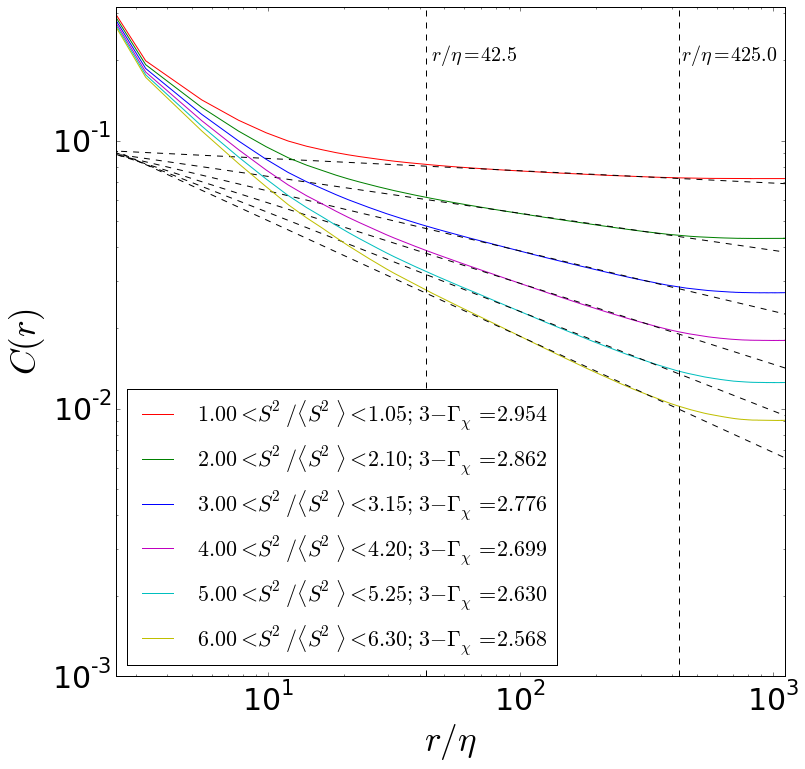

In [22]:
%matplotlib inline

eta = 0.00280

plt.figure(figsize=(12,12))
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 

rbins = np.linspace(minrt,maxrt,1+ner)

bins = (rbins[0:ner]+rbins[1:ner+1])/2
tempRp = bins[(bins/eta>42.5)&(bins/eta<425)]/eta

plt.figure(figsize=(12,12))
plt.xlabel(r'$r/\eta$', fontsize=35)
plt.ylabel(r'$C(r)$', fontsize=35)
plt.xlim([7*10**(-3)/eta,np.pi/eta])
plt.ylim([10**(-3),10**(-0.5)])
    
for i in range(6):
    corrF = ecorr[i]/elogr[i]
    tempCorrF = corrF[(bins/eta>42.5)&(bins/eta<425)]
    
    fit = np.polyfit(np.log(tempRp),np.log(tempCorrF/corrF[0]),1)
    print("t = "+str(tl[i])+"*sigma_2: Linear fit [alpha A] = "+str(fit))
    th = tl[i]
    plt.loglog(bins/eta,(corrF)/(corrF[0]),c[i],label=r'${one:.2f} < S^2/\langle S^2\rangle < {two:.2f};\ 3-\Gamma_\chi = {three:.3f}$'.format(one=tl[i],two=(1+dt)*tl[i],three=3+fit[0]))
    #plt.loglog(bins/eta,(corrF)/(corrF[0]),c[i]+'-',label=r'$ S^2 > '+str(tl[i])+r' \langle S^2\rangle$ : $3-\Gamma_\chi = {0:.3f}$'.format(3+fit[0]))
    plt.loglog(bins/eta,np.exp(fit[1])*((bins/eta)**(fit[0])),'k--')
    
plt.axvline(x=42.50, color='k', linestyle='--')
plt.axvline(x=425.0, color='k', linestyle='--')
plt.text(44.5, 10**(-0.7), r'$r/\eta = 42.5$', fontsize=20)
plt.text(435., 10**(-0.7), r'$r/\eta = 425.0$', fontsize=20)
plt.legend(loc='lower left',prop={'size':22})
plt.savefig('twopoint-strainrate-shells-0.pdf', bbox_inches='tight')

In [23]:
start = time.time()

dt = 0.05
tl = [7,10,15,20,30,50]
c  = ['r','g','b','m','c','y']

ecorr = []
elogr = []

for t in tl:
    start = time.time()
    print(t)
    
    chi[:,:,:] = 0
    chi[(S2 > t*avg)&(S2 < t*(1+dt)*avg)] = 1
    
    fo[:,:,:] = chi[:,:,:]
    fft_object.update_arrays(fo,bo)
    fft_object.execute()
    cchi[:,:,:] = bo[:,:,:]
    
    tmp = cchi*(cchi.conj())
    
    bo[:,:,:] = tmp[:,:,:]
    ifft_object.update_arrays(bo,fo)
    ifft_object.execute()
    corr[:,:,:] = fo[:,:,:]/(N**3)
    
    corrLoc,redges = np.histogram(r2rt,range=(minrt,maxrt),bins = rbins,weights=corr)
    r2Loc,r2edges  = np.histogram(r2rt,range=(minrt,maxrt),bins = rbins)
    
    ecorr.append(corrLoc)
    elogr.append(r2Loc)
    
    end = time.time()
    print("time : "+str(end-start))

7
time : 129.450119972
10
time : 129.387040854
15
time : 129.022325039
20
time : 129.379015923
30
time : 129.109451056
50
time : 129.375789881


t = 7*sigma_2: Linear fit [alpha A] = [-0.48765702 -1.93537016]
t = 10*sigma_2: Linear fit [alpha A] = [-0.6341577  -1.75291385]
t = 15*sigma_2: Linear fit [alpha A] = [-0.83013134 -1.48775801]
t = 20*sigma_2: Linear fit [alpha A] = [-0.99827394 -1.22347502]
t = 30*sigma_2: Linear fit [alpha A] = [-1.27662054 -0.77756367]
t = 50*sigma_2: Linear fit [alpha A] = [-1.69704726 -0.17501043]


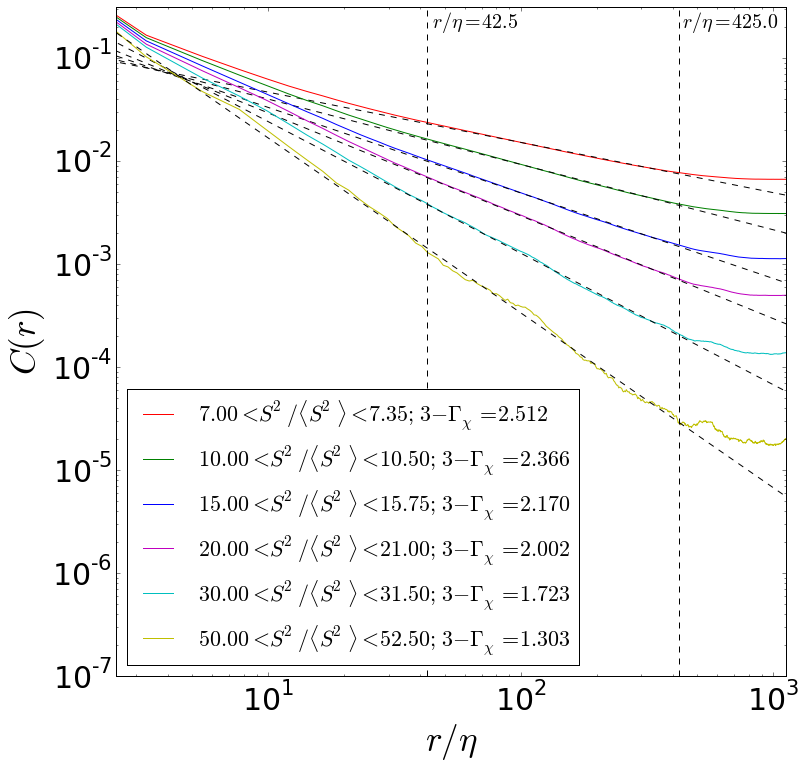

In [35]:
%matplotlib inline

eta = 0.00280

plt.figure(figsize=(12,12))
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 

rbins = np.linspace(minrt,maxrt,1+ner)

bins = (rbins[0:ner]+rbins[1:ner+1])/2
tempRp = bins[(bins/eta>42.5)&(bins/eta<425)]/eta

plt.figure(figsize=(12,12))
plt.xlabel(r'$r/\eta$', fontsize=35)
plt.ylabel(r'$C(r)$', fontsize=35)
plt.xlim([7*10**(-3)/eta,np.pi/eta])
plt.ylim([10**(-7),10**(-0.5)])
    
for i in range(6):
    corrF = ecorr[i]/elogr[i]
    tempCorrF = corrF[(bins/eta>42.5)&(bins/eta<425)]
    
    fit = np.polyfit(np.log(tempRp),np.log(tempCorrF/corrF[0]),1)
    print("t = "+str(tl[i])+"*sigma_2: Linear fit [alpha A] = "+str(fit))
    th = tl[i]
    plt.loglog(bins/eta,(corrF)/(corrF[0]),c[i],label=r'${one:.2f} < S^2/\langle S^2\rangle < {two:.2f};\ 3-\Gamma_\chi = {three:.3f}$'.format(one=tl[i],two=(1+dt)*tl[i],three=3+fit[0]))
    #plt.loglog(bins/eta,(corrF)/(corrF[0]),c[i]+'-',label=r'$ S^2 > '+str(tl[i])+r' \langle S^2\rangle$ : $3-\Gamma_\chi = {0:.3f}$'.format(3+fit[0]))
    plt.loglog(bins/eta,np.exp(fit[1])*((bins/eta)**(fit[0])),'k--')
    
plt.axvline(x=42.50, color='k', linestyle='--')
plt.axvline(x=425.0, color='k', linestyle='--')
plt.text(44.5, 10**(-0.7), r'$r/\eta = 42.5$', fontsize=20)
plt.text(435., 10**(-0.7), r'$r/\eta = 425.0$', fontsize=20)
plt.legend(loc='lower left',prop={'size':22})
plt.savefig('twopoint-strainrate-shells-1.pdf', bbox_inches='tight')

In [29]:
start = time.time()

dt = 0.05
tl = [1,2,3,4,5,6]
c  = ['r','g','b','m','c','y']

lcorr = []
llogr = []

for t in tl:
    start = time.time()
    print(t)
    
    chi[:,:,:] = 0
    chi[(w2 > t*avg)&(w2 < t*(1+dt)*avg)] = 1
    
    fo[:,:,:] = chi[:,:,:]
    fft_object.update_arrays(fo,bo)
    fft_object.execute()
    cchi[:,:,:] = bo[:,:,:]
    
    tmp = cchi*(cchi.conj())
    
    bo[:,:,:] = tmp[:,:,:]
    ifft_object.update_arrays(bo,fo)
    ifft_object.execute()
    corr[:,:,:] = fo[:,:,:]/(N**3)
    
    corrLoc,redges = np.histogram(r2rt,range=(minrt,maxrt),bins = rbins,weights=corr)
    r2Loc,r2edges  = np.histogram(r2rt,range=(minrt,maxrt),bins = rbins)
    
    lcorr.append(corrLoc)
    llogr.append(r2Loc)
    
    end = time.time()
    print("time : "+str(end-start))

1
time : 129.923745871
2
time : 129.535547018
3
time : 129.167617083
4
time : 129.25644803
5
time : 129.058840036
6
time : 128.757694006


t = 1*sigma_2: Linear fit [alpha A] = [-0.03155301 -2.7055044 ]
t = 2*sigma_2: Linear fit [alpha A] = [-0.0856192  -2.80331696]
t = 3*sigma_2: Linear fit [alpha A] = [-0.13356937 -2.86858722]
t = 4*sigma_2: Linear fit [alpha A] = [-0.17641625 -2.91229582]
t = 5*sigma_2: Linear fit [alpha A] = [-0.21467839 -2.94235492]
t = 6*sigma_2: Linear fit [alpha A] = [-0.24959049 -2.96394362]


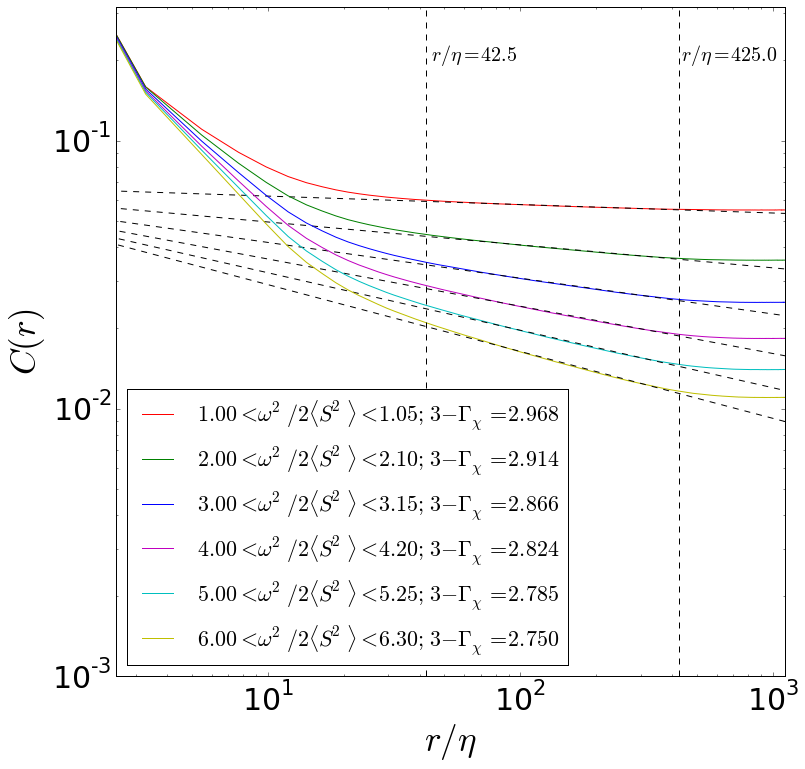

In [30]:
%matplotlib inline

eta = 0.00280

plt.figure(figsize=(12,12))
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 

rbins = np.linspace(minrt,maxrt,1+ner)

bins = (rbins[0:ner]+rbins[1:ner+1])/2
tempRp = bins[(bins/eta>42.5)&(bins/eta<425)]/eta

plt.figure(figsize=(12,12))
plt.xlabel(r'$r/\eta$', fontsize=35)
plt.ylabel(r'$C(r)$', fontsize=35)
plt.xlim([7*10**(-3)/eta,np.pi/eta])
plt.ylim([10**(-3),10**(-0.5)])
    
for i in range(6):
    corrF = lcorr[i]/llogr[i]
    tempCorrF = corrF[(bins/eta>42.5)&(bins/eta<425)]
    
    fit = np.polyfit(np.log(tempRp),np.log(tempCorrF/corrF[0]),1)
    print("t = "+str(tl[i])+"*sigma_2: Linear fit [alpha A] = "+str(fit))
    th = tl[i]
    plt.loglog(bins/eta,(corrF)/(corrF[0]),c[i],label=r'${one:.2f} < \omega^2/2\langle S^2\rangle < {two:.2f};\ 3-\Gamma_\chi = {three:.3f}$'.format(one=tl[i],two=(1+dt)*tl[i],three=3+fit[0]))
    #plt.loglog(bins/eta,(corrF)/(corrF[0]),c[i]+'-',label=r'$ S^2 > '+str(tl[i])+r' \langle S^2\rangle$ : $3-\Gamma_\chi = {0:.3f}$'.format(3+fit[0]))
    plt.loglog(bins/eta,np.exp(fit[1])*((bins/eta)**(fit[0])),'k--')
    
plt.axvline(x=42.50, color='k', linestyle='--')
plt.axvline(x=425.0, color='k', linestyle='--')
plt.text(44.5, 10**(-0.7), r'$r/\eta = 42.5$', fontsize=20)
plt.text(435., 10**(-0.7), r'$r/\eta = 425.0$', fontsize=20)
plt.legend(loc='lower left',prop={'size':22})
plt.savefig('twopoint-enstrophy-shells-0.pdf', bbox_inches='tight')

In [31]:
start = time.time()

tl = [7,10,15,20,30,50]
c  = ['r','g','b','m','c','y']

lcorr = []
llogr = []

for t in tl:
    start = time.time()
    print(t)
    
    chi[:,:,:] = 0
    chi[(w2 > t*avg)&(w2 < t*(1+dt)*avg)] = 1
    
    fo[:,:,:] = chi[:,:,:]
    fft_object.update_arrays(fo,bo)
    fft_object.execute()
    cchi[:,:,:] = bo[:,:,:]
    
    tmp = cchi*(cchi.conj())
    
    bo[:,:,:] = tmp[:,:,:]
    ifft_object.update_arrays(bo,fo)
    ifft_object.execute()
    corr[:,:,:] = fo[:,:,:]/(N**3)
    
    corrLoc,redges = np.histogram(r2rt,range=(minrt,maxrt),bins = rbins,weights=corr)
    r2Loc,r2edges  = np.histogram(r2rt,range=(minrt,maxrt),bins = rbins)
    
    lcorr.append(corrLoc)
    llogr.append(r2Loc)
    
    end = time.time()
    print("time : "+str(end-start))

7
time : 149.97925806
10
time : 133.071067095
15
time : 127.717148066
20
time : 127.640605927
30
time : 127.641859055
50
time : 127.578404903


t = 7*sigma_2: Linear fit [alpha A] = [-0.28168659 -2.97751179]
t = 10*sigma_2: Linear fit [alpha A] = [-0.36657079 -2.99482774]
t = 15*sigma_2: Linear fit [alpha A] = [-0.4787009  -2.99184789]
t = 20*sigma_2: Linear fit [alpha A] = [-0.57199123 -2.95926106]
t = 30*sigma_2: Linear fit [alpha A] = [-0.71133315 -2.93628309]
t = 50*sigma_2: Linear fit [alpha A] = [-0.93703104 -2.74839782]


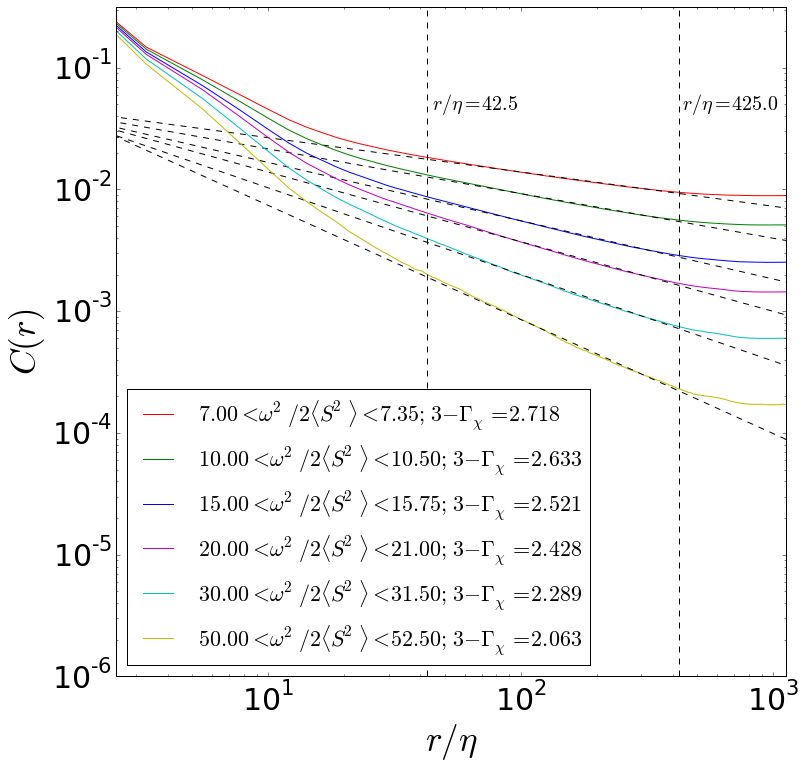

In [36]:
%matplotlib inline

eta = 0.00280

plt.figure(figsize=(12,12))
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 

rbins = np.linspace(minrt,maxrt,1+ner)

bins = (rbins[0:ner]+rbins[1:ner+1])/2
tempRp = bins[(bins/eta>42.5)&(bins/eta<425)]/eta

plt.figure(figsize=(12,12))
plt.xlabel(r'$r/\eta$', fontsize=35)
plt.ylabel(r'$C(r)$', fontsize=35)
plt.xlim([7*10**(-3)/eta,np.pi/eta])
plt.ylim([10**(-6),10**(-0.5)])
    
for i in range(6):
    corrF = lcorr[i]/llogr[i]
    tempCorrF = corrF[(bins/eta>42.5)&(bins/eta<425)]
    
    fit = np.polyfit(np.log(tempRp),np.log(tempCorrF/corrF[0]),1)
    print("t = "+str(tl[i])+"*sigma_2: Linear fit [alpha A] = "+str(fit))
    th = tl[i]
    plt.loglog(bins/eta,(corrF)/(corrF[0]),c[i],label=r'${one:.2f} < \omega^2/2\langle S^2\rangle < {two:.2f};\ 3-\Gamma_\chi = {three:.3f}$'.format(one=tl[i],two=(1+dt)*tl[i],three=3+fit[0]))
    plt.loglog(bins/eta,np.exp(fit[1])*((bins/eta)**(fit[0])),'k--')
    
plt.axvline(x=42.50, color='k', linestyle='--')
plt.axvline(x=425.0, color='k', linestyle='--')
plt.text(44.5, 0.045, r'$r/\eta = 42.5$', fontsize=20)
plt.text(435., 0.045, r'$r/\eta = 425.0$', fontsize=20)
plt.legend(loc='lower left',prop={'size':22})
plt.savefig('twopoint-enstrophy-shells-1.pdf', bbox_inches='tight')